In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("Mall_Customers.csv")

In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
x=df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
x.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

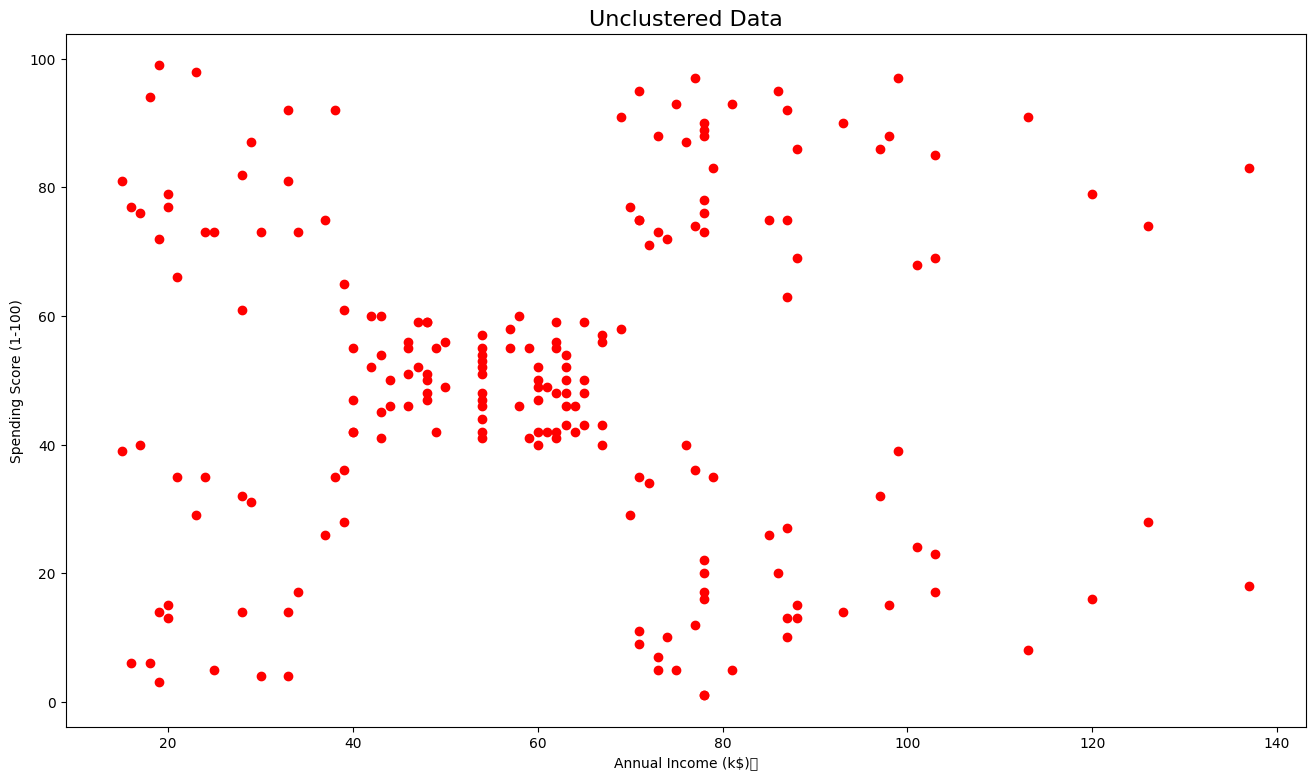

In [17]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data',fontsize=16)
plt.xlabel('Annual Income (k$)	')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],color='r')

In [22]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [23]:
km=KMeans(n_clusters=3)
km.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
km.inertia_

106348.37306211118

In [28]:
sse=[]

In [65]:
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [66]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 25388.760028179364,
 21829.135638779822,
 20022.611567624397,
 17602.177833635902,
 15927.816722524789,
 14695.148714861953,
 13323.724832915623,
 11992.851775417566]

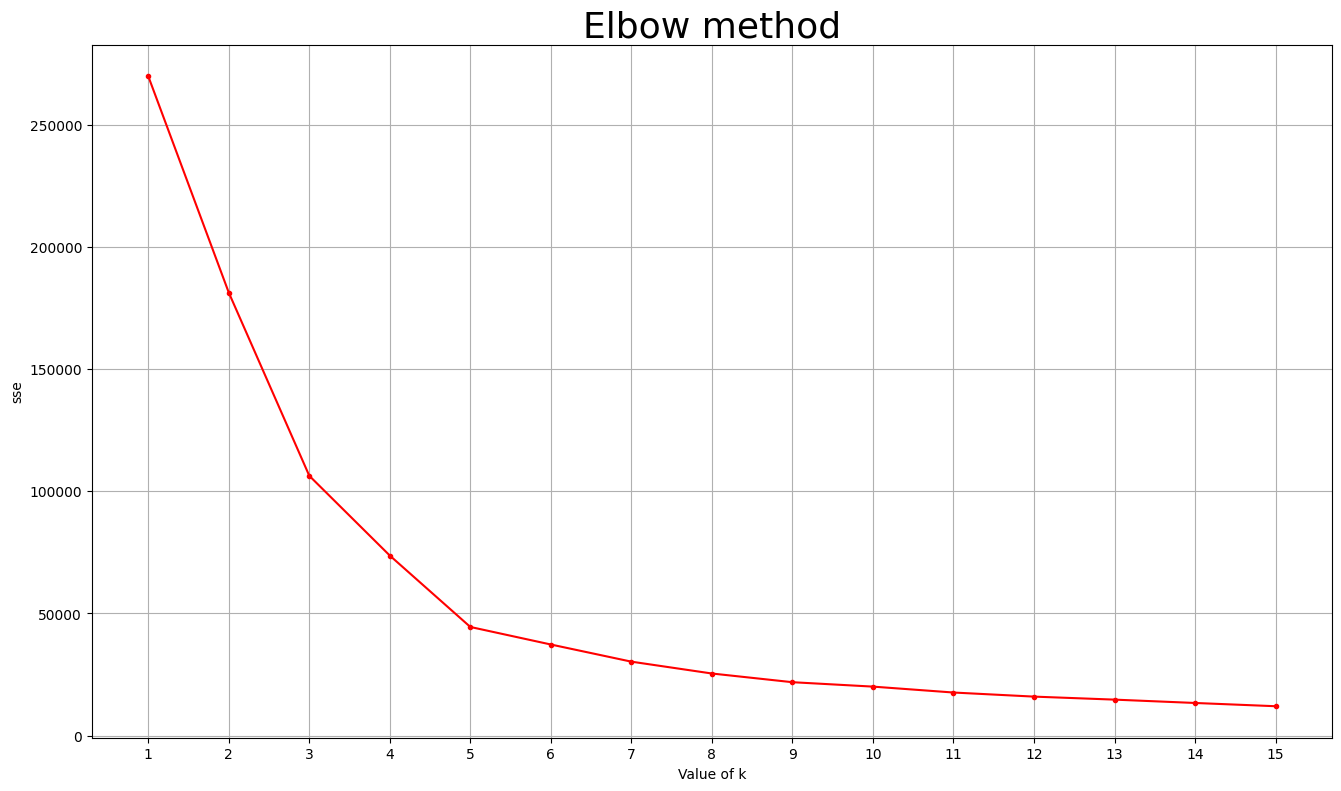

In [95]:
plt.figure(figsize=(16,9))
plt.title('Elbow method',fontsize=26)
plt.xlabel('Value of k')
plt.ylabel('sse')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='r')

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(km.inertia_)

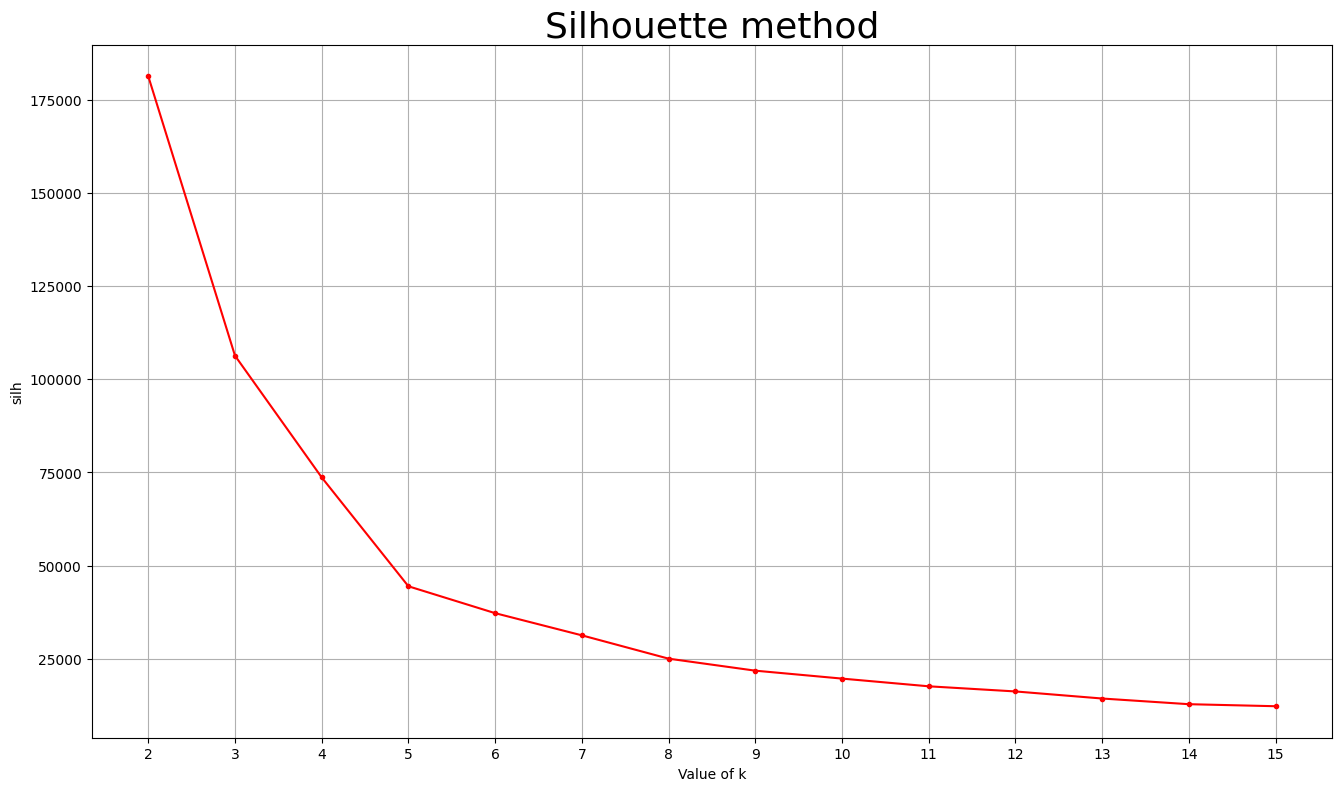

In [94]:
plt.figure(figsize=(16,9))
plt.title('Silhouette method',fontsize=26)
plt.xlabel('Value of k')
plt.ylabel('silh')
plt.grid()
plt.xticks(range(2,16))
plt.plot(range(2,16),silh,marker='.',color='r')

In [79]:
km=KMeans(n_clusters=5)
lables=km.fit_predict(x)

In [80]:
lables

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [81]:
km.inertia_

44448.45544793371

In [82]:
cent=km.cluster_centers_
cent

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

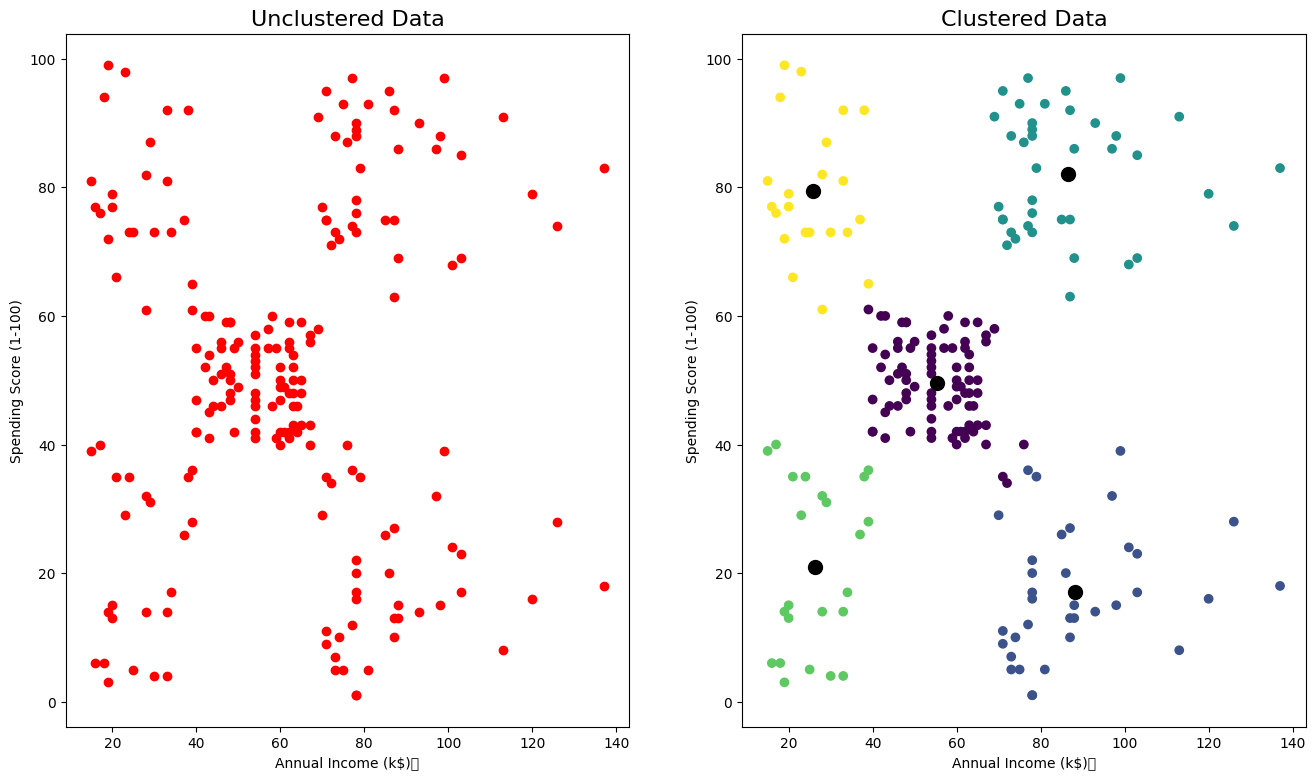

In [86]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data',fontsize=16)
plt.xlabel('Annual Income (k$)	')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],color='r')

plt.subplot(1,2,2)
plt.title('Clustered Data',fontsize=16)
plt.xlabel('Annual Income (k$)	')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=lables)
plt.scatter(cent[:,0],cent[:,1],s=100,color='black')

In [87]:
agl=AgglomerativeClustering(n_clusters=5)
alabels=agl.fit_predict(x)
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


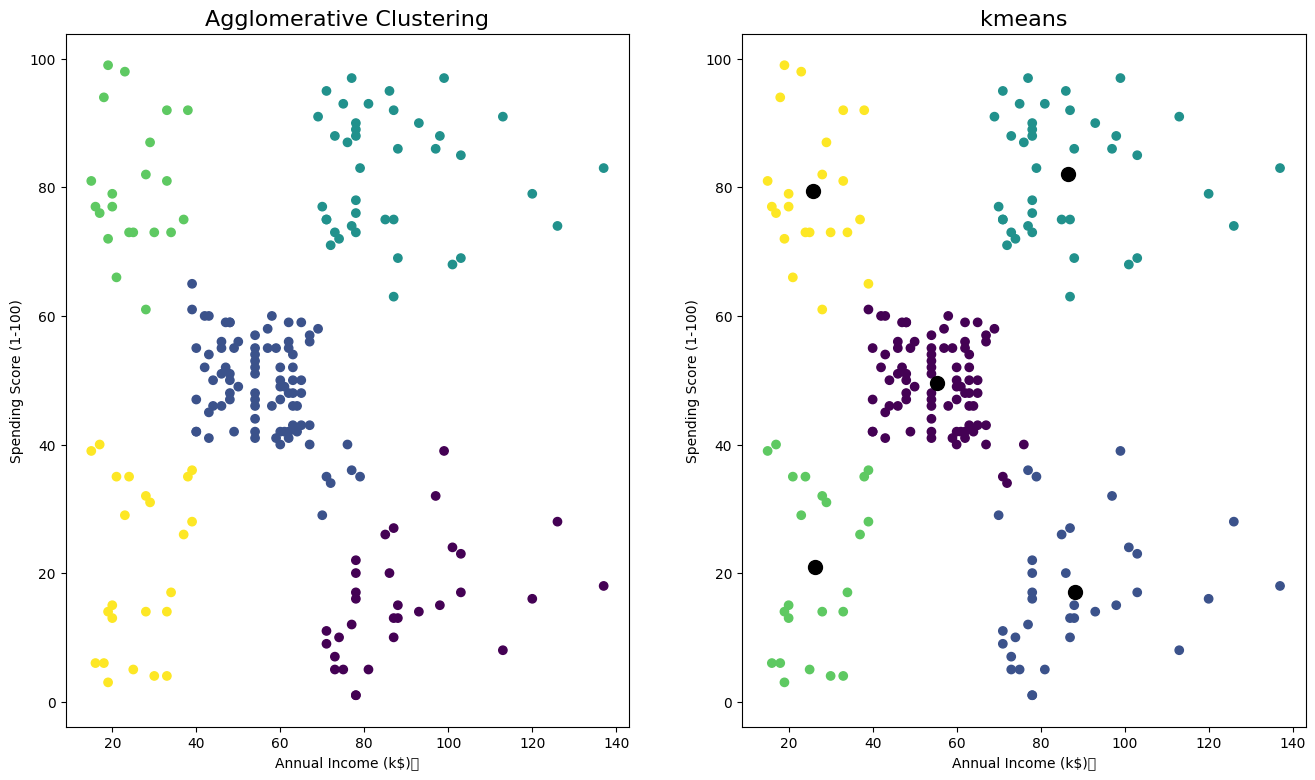

In [93]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative Clustering',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)

plt.subplot(1,2,2)
plt.title('kmeans',fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=lables)
plt.scatter(cent[:,0],cent[:,1],s=100,color='black')